Question:<br>
How does improved medical level (increased life expectancy) affect fertility rate and death rate,therefore age demographics?

Methodology:
    <br>Input:<br>life expectancy (dataset); <br>fertility rate(dataset);<br>initial young, middle age, and elder population; <br>division of age groups.
    <p>Calculation:<br> "death rate"(of elder people) based on life expectancy,  <br>"birth rate" (among middle age) based on fertility rate, 
    <br>birth population based on middle age population and "birth rate",  
    <br>Fixed fertility age(middle age) span;
    <br>Elder age updating as people live longer
        
<p>Updating Function: <br>Assuming 1/age_range of people entering next age stage every year.
    
   

In [1405]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [1406]:
#read csv file that contains our data for world population, life expectancy, and fertility rate
from pandas import read_csv
filename = 'project1data1.csv'
tables = read_csv(filename, header=0, index_col=0, decimal='M');

In [1425]:
def plot_results(un, ts_young, ts_middle, ts_old, timeseries, title):
    """Plot the estimates and the model.
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """
    plot(un, '--', label='UN DESA')
    plot(ts_young, color='blue', label='young population')
    plot(ts_middle, color='black', label='Mid-age poplation')
    plot(ts_old, color='green', label='elder population')
    plot(timeseries, color='gray', label='total')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)

In [1417]:
"""Our notebook was confused by decimals so within our data set we 
multiplied our numbers by 1000 in order to get rid of the decimals, 
so we then had to divide by 1000"""
life_expectancy = tables._expectancyx1000/1000
fer_rate = tables.fer_ratex1000/1000
un = tables.UN / 1e9; #In billions

In [1418]:
"""In order to divide the population into young middle and old, 
we found the global age demographics in 1965: 37.8% under 15, 
42.2% between 15 and 44, and 20% 45 and older."""
young = get_first_value(un) * 0.378
old= get_first_value(un) * 0.2
middle = get_first_value(un)*0.422
init = State(young=young, middle=middle, old=old);
""""""

birth_rate = fer_rate/(31*2);
#children per woman in her fer age per year

In [1419]:
"""The age years under 15 is 14, so we assume that 1/14 of them gets 15 (which counts as a middle age) gets mature.
    The same applies that 1/31 of the middle age people gets old."""

system = System(t_0 = 1965,
                t_end = 2016,
                init=init);

In [1420]:
def update_func1(state, t, system):
    """This functions illustrates the situation every year:
    """
    if(t<1976):
        old_age = 42
    else:
        old_age = 45
    #defining different old age based on prolonged life span
    
    elder_rate = 1/(30+1)
    #1/31 of the middle age people gets old every year
    mature_rate = 1/(old_age-30)
    #1/(young pop age span) enters fertility age evey year
    death_rate = 1/((life_expectancy[t])-old_age-1)
    birth_rate2 = birth_rate[t]
    births = birth_rate2*state.middle
    #New born babies based on the middle age population.
    maturings = mature_rate * state.young
    #1/14 young people entering middle age.
    agings = elder_rate * state.middle
    #1/31 middle age gets old.
    #death_rate2 = death_rate[t]
    #death rate based on the life expectancy
    deaths = death_rate * state.old
    young = state.young + births - maturings
    middle = state.middle + maturings - agings
    old = state.old + agings - deaths
    #calculating updated age groups population
    #print(death_rate, deaths)
    
    return State(young=young, middle=middle, old=old)
    

In [1421]:
state = update_func1(init, system.t_0, system)
#initializing age groups

,values
young,1.267405
middle,1.464438
old,0.646255


In [1422]:
state = update_func1(state, system.t_0, system);
#updating each year

In [1423]:
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    init: initial State object
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries() 
    results_young = TimeSeries()
    results_middle = TimeSeries()
    results_old = TimeSeries()
    
    state = system.init
    results[system.t_0] = state.young + state.middle + state.old
    
    for t in linrange(system.t_0, system.t_end):
        state = update_func(state, t, system)
        results[t+1] = state.young + state.middle + state.old
        results_young[t+1] = state.young
        results_middle[t+1] =state.middle
        results_old[t+1] =state.old
        
    return results, results_young, results_middle, results_old

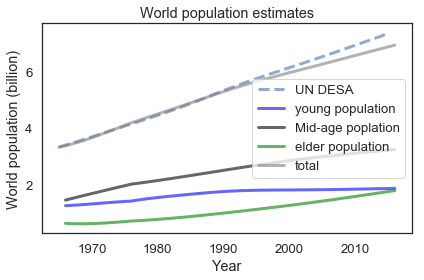

In [1426]:
"""Saving the data in TimeSeries"""
results = run_simulation(system, update_func1)[0];
results_young = run_simulation(system, update_func1)[1];
results_middle = run_simulation(system, update_func1)[2];
results_old = run_simulation(system, update_func1)[3];
plot_results(un, results_young, results_middle, results_old, results, 'World population estimates')

#### Results:<p>
    As the life expectancy gets bigger, the youngest age group levels off as the other groups get more population. The elder group population grows fastest. The curves of young and aged population are even going to intersect.
    

Interpretation:<p>
As the life expectancy gets longer, the old age group constantly grows bigger and the young population (or the birth rate) is actually decreasing.
<p> The model (added up 3 age groups) fits well with actual population, and the trends of age demographics shows that with the increased medical level, people have fewer children and can live longer, as we expected.
  <p>From 2000, the model doesn't fit that well, might due to the middle age range we defined should have been updated.